In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Function for Import of EIC, BPC and IECs
BPC can be activatet or deactivated (if mass range changes for example)

In [2]:
def get_IEC_df(IEC_vals, BPC,filepath_wo_name):
        filepath = os.getcwd() + "/" +filepath_wo_name 
        df_name = pd.read_csv(filepath + "exported Chromatogram TIC +All MS.xy", sep=" ", header=None, names=["t","TIC"])
        for IECs in range(len(IEC_vals)):
            df_name.insert(IECs+2, IEC_vals[IECs]
                           , pd.read_csv(filepath +"exported Chromatogram EIC "+IEC_vals[IECs]+" +All MS.xy"
                                         , sep=" ", header=None).iloc[:,1])
        if BPC == True:
            df_name.insert(2, "BPC"
                           , pd.read_csv(filepath+"exported Chromatogram BPC 49.0000-701.0000 +All MS.xy"
                                         , sep=" ", header=None).iloc[:,1])
        return df_name

## Get Ms Data for the individual runs, note that for run one the ms file is split into two


In [3]:
folders_ms=["20230404_n20_v1_02_var/20230404_rxn_n20_000003.d/","20230404_n20_v1_03_var/20230404_rxn_n20_000004.d/","20230405_n20_v1_01_var/20230405_rxn_n20_000001.d/","20230405_n20_v1_02_var/20230405_rxn_n20_000002.d/","20230406_n20_v1_01_var/20230406_rxn_n20_000001.d/","20230407_n20_v1_01_var/20230407_rxn_n20_000001.d/","20230408_n20_v1_01_var/20230408_rxn_n20_000001.d/"]
#print (folders_ms)
IEC_vals = ["155.1400","157.0500","181.2000","293.1800"]


#print (all_ms_data)

#plt.scatter(all_ms_data["t"]/60,all_ms_data["181.2000"],marker=".")
#plt.show()

def get_averages(df_name,START,STOP,EQU,ACQ):
    n_iter = len(range(START,STOP,1))/(EQU+ACQ)
    if n_iter.is_integer()==True:
        indx = []
        AVGs = pd.DataFrame()
        #df_name = df_name.reset_index(drop=True)
        #df_name = df_name.set_index("t")
        #print (df_name)
        for i in range(0,int(n_iter),1):
            new_indx = list(range(START+EQU+((EQU+ACQ)*(i)),(START+EQU+((EQU+ACQ)*(i)+ACQ))+1,1))
            #print(START+EQU+((EQU+ACQ)*(i)))
            #print ((START+EQU+((EQU+ACQ)*(i)+ACQ)))
            #print (new_indx)
            AVG = pd.DataFrame(df_name.iloc[new_indx].mean()).T
            AVGs=pd.concat([AVGs,AVG])
            #indx = indx+new_indx
        AVGs = AVGs.reset_index(drop=True)
        return AVGs
        #indx = [list(range((START+EQU),ACQ,1)) for i in range(0,int(n_iter),1)]
        #print (indx)
    else:
        print("Wrong start or stop time. One measurement run is not completely finished")
        print ("n_iter:",n_iter)
   

10
10
10
10
20
20
20
20
20
20
20
180


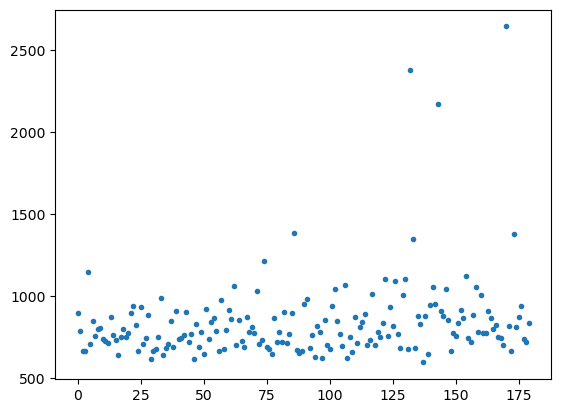

In [4]:
folders_10 = ["20230403_n10_v1_01_same_df_MeOH/20230403_rxn_n10_000001.d/",
"20230403_n10_v1_02_var/20230403_rxn_n10_000002.d/","20230404_n20_v1_01_var_2MS_files/20230404_rxn_n20_000001.d/","20230404_n20_v1_01_var_2MS_files/20230404_rxn_n20_000002.d/"]

all_ms_data_1 = pd.DataFrame()
for folders in folders_10:
    temp = get_IEC_df(IEC_vals, False,folders)
    temp2 = get_averages(temp,0,100*59,5*59,5*59)
    print (len(temp2))
    all_ms_data_1 = pd.concat([all_ms_data_1,temp2])
folders_20 =["20230404_n20_v1_02_var/20230404_rxn_n20_000003.d/","20230404_n20_v1_03_var/20230404_rxn_n20_000004.d/","20230405_n20_v1_01_var/20230405_rxn_n20_000001.d/","20230405_n20_v1_02_var/20230405_rxn_n20_000002.d/","20230406_n20_v1_01_var/20230406_rxn_n20_000001.d/","20230407_n20_v1_01_var/20230407_rxn_n20_000001.d/","20230408_n20_v1_01_var/20230408_rxn_n20_000001.d/"]
#print (folders_ms)
all_ms_data_2 = pd.DataFrame()
for folders in folders_20:
    temp = get_IEC_df(IEC_vals, False,folders)
    temp2 = get_averages(temp,0,200*59,5*59,5*59)
    print (len(temp2))
    all_ms_data_2 = pd.concat([all_ms_data_2,temp2])

all_ms_data = pd.concat([all_ms_data_1,all_ms_data_2])

all_ms_data.reset_index(drop=True, inplace=True)

print(len(all_ms_data))
#all_ms_data_avg = get_averages(all_ms_data,0,1600*59,5*59,5*59)
all_ms_data_avg = all_ms_data
plt.scatter(all_ms_data.index,all_ms_data["181.2000"],marker=".")
plt.show()
#print (all_ms_data_avg)

          t[s]                timestamp Flow1 Flow2 Flow3 Flow4 Flow5
0      300.003  2023-04-03 19:46:13:803   2.3   0.5   0.8   2.5   2.0
1      900.001  2023-04-03 19:56:13:801   0.7   2.8   2.1   0.9   2.0
2     1500.001  2023-04-03 20:06:13:801   2.6   2.6   0.8   1.6   0.5
3       2100.0  2023-04-03 20:16:13:800   1.7   1.8   1.4   0.6   2.1
4     2700.001  2023-04-03 20:26:13:801   2.3   0.5   1.6   1.8   2.8
..         ...                      ...   ...   ...   ...   ...   ...
175   9300.301  2023-04-08 19:39:45:139   0.5   1.9   1.6   0.8   2.9
176   9900.318  2023-04-08 19:49:45:156   0.6   1.7   1.2   1.8   1.5
177  10500.301  2023-04-08 19:59:45:139   1.5   2.5   1.6   2.8   2.2
178    11100.3  2023-04-08 20:09:45:138   1.4   2.3   2.4   2.7   1.4
179  11700.301  2023-04-08 20:19:45:139   1.0   2.1   1.6   1.5   1.9

[180 rows x 7 columns]


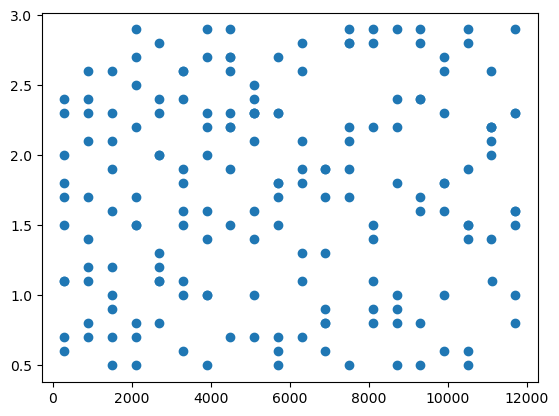

                t           TIC      155.1400       157.0500     181.2000  \
0      444.976098  9.771952e+05  22454.891892   10196.472973   897.013514   
1     1036.771010  1.675669e+06  64874.310811  668783.054054   787.864865   
2     1628.566649  1.260596e+06  30723.189189  375030.216216   664.648649   
3     2220.362932  1.288674e+06  35867.756757  276196.270270   663.716216   
4     2812.158166  1.161767e+06  25546.513514    8418.932432  1144.675676   
..            ...           ...           ...            ...          ...   
175   9321.934095  1.063635e+06  39770.364865  257038.445946   875.054054   
176   9913.729699  1.058304e+06  35963.418919  339487.500000   941.270270   
177  10505.525601  8.127592e+05  24799.918919   83204.472973   738.716216   
178  11097.320287  8.708082e+05  24385.378378   80224.162162   718.702703   
179  11689.121243  9.936115e+05  32457.094595  213332.986486   837.324324   

          293.1800  
0    258278.094595  
1    144412.162162  
2    245824.

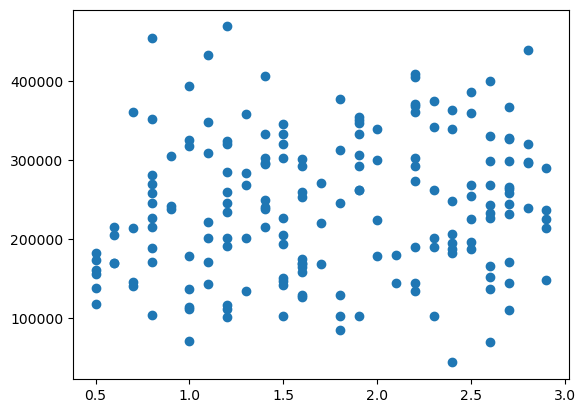

In [5]:
#flow_data_name = "PlotData_20230330_204535"
#flow_data = pd.read_csv(flow_data_name+".csv", sep=";",header=0,decimal=','
#                        ,names=["t[s]","timestamp","Flow1","Flow2","Flow3","Flow4","Flow5"])
#flow_data_RUN_1 = pd.read_csv(os.getcwd()+"/RUN_1/"+"PlotData_20230404_152006"+".csv", sep=";",header=0,decimal=','
#                        ,names=["t[s]","timestamp","Flow1","Flow2","Flow3","Flow4","Flow5"])
#flow_data_RUN_2 = pd.read_csv(os.getcwd()+"/RUN_2/"+"PlotData_20230404_194957"+".csv", sep=";",header=0,decimal=','
#                        ,names=["t[s]","timestamp","Flow1","Flow2","Flow3","Flow4","Flow5"])
#flow_data_RUN_3 = pd.read_csv(os.getcwd()+"/RUN_3/"+"PlotData_20230405_004846"+".csv", sep=";",header=0,decimal=','
#                        ,names=["t[s]","timestamp","Flow1","Flow2","Flow3","Flow4","Flow5"])

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



flow_files_20 =["20230404_n20_v1_01_var_2MS_files/PlotData_20230404_152006.csv","20230404_n20_v1_02_var/PlotData_20230404_194957.csv","20230404_n20_v1_03_var/PlotData_20230405_004846.csv","20230405_n20_v1_01_var/PlotData_20230405_144359.csv","20230405_n20_v1_02_var/PlotData_20230405_200026.csv","20230406_n20_v1_01_var/PlotData_20230406_211949.csv","20230407_n20_v1_01_var/PlotData_20230407_191657.csv","20230408_n20_v1_01_var/PlotData_20230408_202445.csv"]
flow_files_10 = ["20230403_n10_v1_01_same_df_MeOH/PlotData_20230403_212113.csv","20230403_n10_v1_02_var/PlotData_20230403_231119.csv"]

flow_data_10 = pd.DataFrame()
#for files in flow_files:
#    flow_data = pd.read_csv(os.getcwd()+"/"+files, sep=";",header=0,decimal=',',names=["t[s]","timestamp","Flow1","Flow2","Flow3","Flow4","Flow5"])
#    flow_data_all = pd.concat([flow_data_all,flow_data])
    
#print(flow_data_all)
#plt.scatter(flow_data_all["t[s]"],flow_data_all["Flow1"])
#plt.show()
def get_averages_Flow(df_name,START,STOP,EQU,ACQ):
    n_iter = len(range(START,STOP,1))/(EQU+ACQ)
    if n_iter.is_integer()==True:
        indx = []
        AVGs = pd.DataFrame()
        for i in range(0,int(n_iter),1):
            #new_indx = list(range(START+EQU+((EQU+ACQ)*(i)),(START+EQU+((EQU+ACQ)*(i)+ACQ))+1,1))
            new_indx = START+EQU+((EQU+ACQ)*(i))
            AVG = pd.DataFrame(df_name.loc[new_indx]).T
            AVGs=pd.concat([AVGs,AVG])
            #indx = indx+new_indx
        AVGs = AVGs.reset_index(drop=True)
        return AVGs
        #indx = [list(range((START+EQU),ACQ,1)) for i in range(0,int(n_iter),1)]
        #print (indx)
    else:
        print("Wrong start or stop time. One measurement run is not completely finished")
        print ("n_iter:",n_iter)
        
        
        
flow_data_10 = pd.DataFrame()
for files in flow_files_10:
    flow_data = pd.read_csv(os.getcwd()+"/"+files, sep=";",header=0,decimal=',',names=["t[s]","timestamp","Flow1","Flow2","Flow3","Flow4","Flow5"])
    temp = get_averages_Flow(flow_data,0,100*600,5*600,5*600)
    flow_data_10 = pd.concat([flow_data_10,temp])
    
flow_data_20 = pd.DataFrame()
for files in flow_files_20:
    flow_data = pd.read_csv(os.getcwd()+"/"+files, sep=";",header=0,decimal=',',names=["t[s]","timestamp","Flow1","Flow2","Flow3","Flow4","Flow5"])
    temp = get_averages_Flow(flow_data,0,200*600,5*600,5*600)
    flow_data_20 = pd.concat([flow_data_20,temp])
        
        
flow_data_all_avg = pd.concat([flow_data_10,flow_data_20])
        
flow_data_all_avg.reset_index(drop=True, inplace=True)
print (flow_data_all_avg)
#flow_data_all_avg = get_averages_Flow(flow_data_all,0,1800*590,5*590,5*590)

#plt.figure(figsize=(15,6))
plt.scatter(flow_data_all_avg["t[s]"],flow_data_all_avg["Flow1"])
plt.show()
#print (flow_data_all_avg)
print (all_ms_data_avg)

plt.scatter(flow_data_all_avg["Flow3"], all_ms_data_avg["293.1800"])
#print ("LOL",flow_data_all_avg)

In [6]:
#first_try_AVG["YIELD"] = first_try_AVG["293.0000"]/first_try_AVG["155.2500"]
all_ms_data_avg["YIELD"] = all_ms_data_avg["293.1800"]/all_ms_data_avg["155.1400"]
flow_data_all_avg["t_dwell"] = flow_data_all_avg["Flow1"]+flow_data_all_avg["Flow2"]+flow_data_all_avg["Flow3"]+flow_data_all_avg["Flow4"]+flow_data_all_avg["Flow5"] 
print (flow_data_all_avg)
print (len(all_ms_data_avg))


          t[s]                timestamp Flow1 Flow2 Flow3 Flow4 Flow5 t_dwell
0      300.003  2023-04-03 19:46:13:803   2.3   0.5   0.8   2.5   2.0     8.1
1      900.001  2023-04-03 19:56:13:801   0.7   2.8   2.1   0.9   2.0     8.5
2     1500.001  2023-04-03 20:06:13:801   2.6   2.6   0.8   1.6   0.5     8.1
3       2100.0  2023-04-03 20:16:13:800   1.7   1.8   1.4   0.6   2.1     7.6
4     2700.001  2023-04-03 20:26:13:801   2.3   0.5   1.6   1.8   2.8     9.0
..         ...                      ...   ...   ...   ...   ...   ...     ...
175   9300.301  2023-04-08 19:39:45:139   0.5   1.9   1.6   0.8   2.9     7.7
176   9900.318  2023-04-08 19:49:45:156   0.6   1.7   1.2   1.8   1.5     6.8
177  10500.301  2023-04-08 19:59:45:139   1.5   2.5   1.6   2.8   2.2    10.6
178    11100.3  2023-04-08 20:09:45:138   1.4   2.3   2.4   2.7   1.4    10.2
179  11700.301  2023-04-08 20:19:45:139   1.0   2.1   1.6   1.5   1.9     8.1

[180 rows x 8 columns]
180


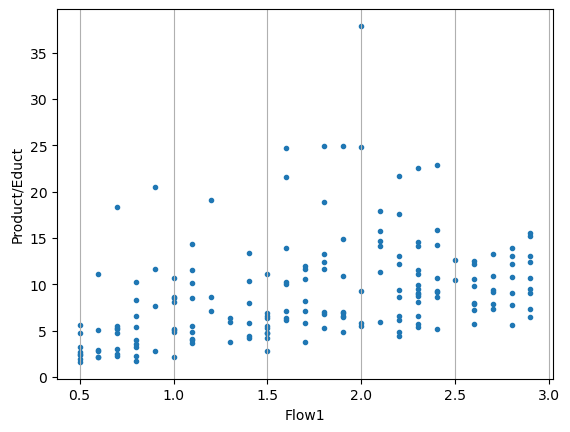

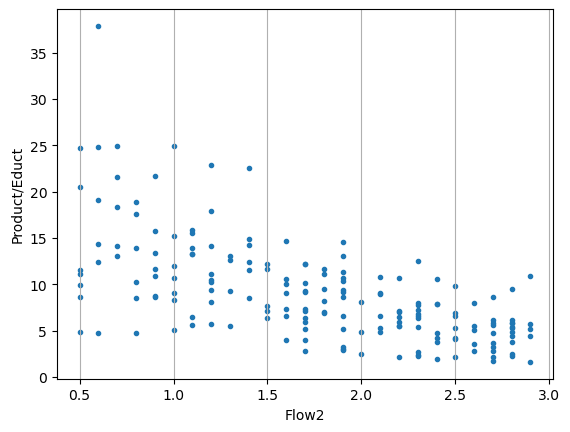

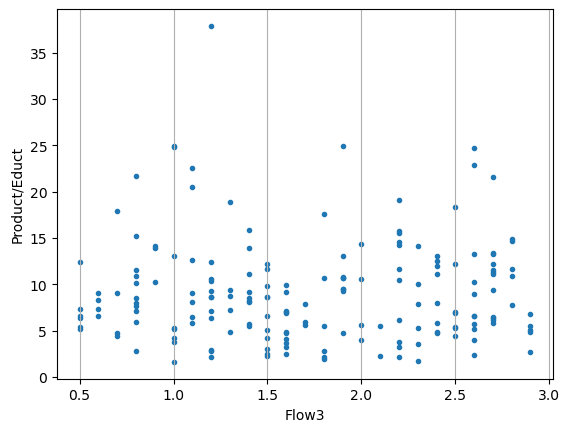

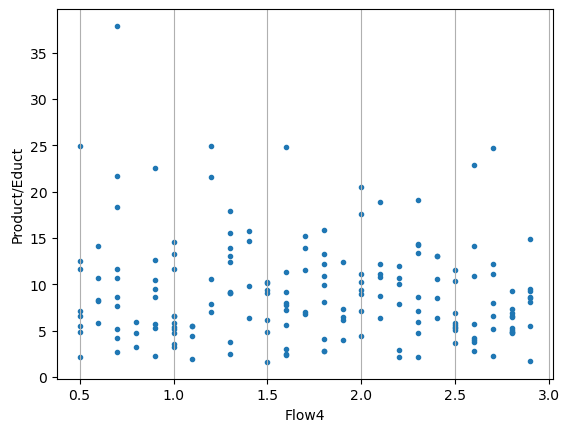

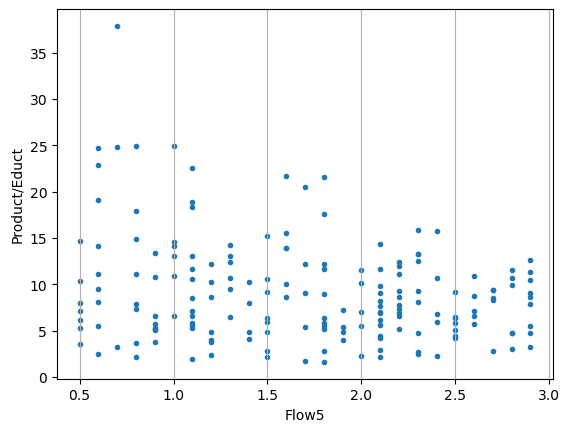

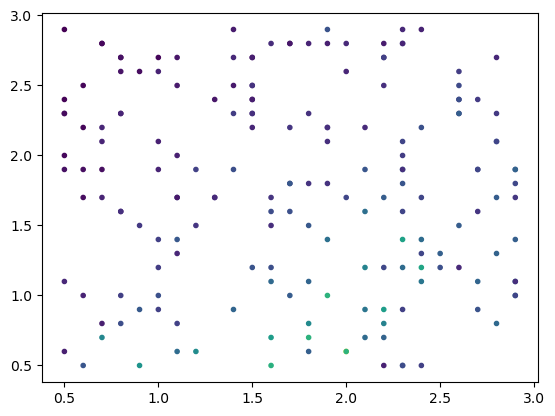

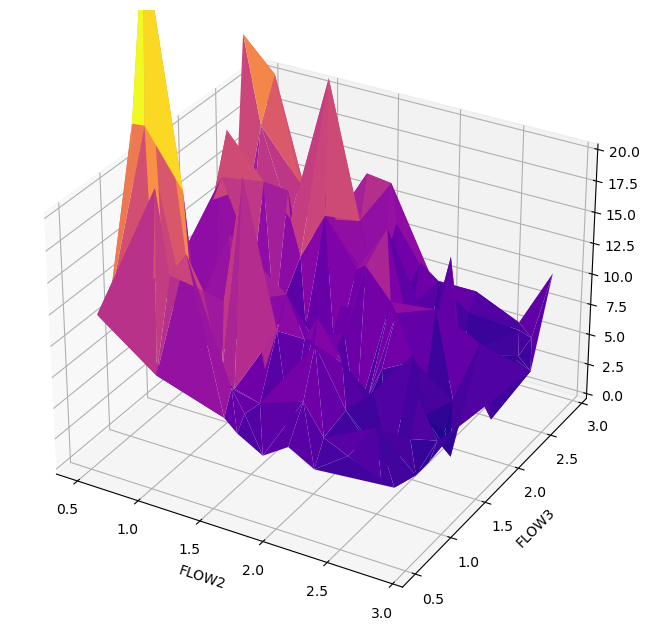

Text(0, 0.5, 'YIELD')

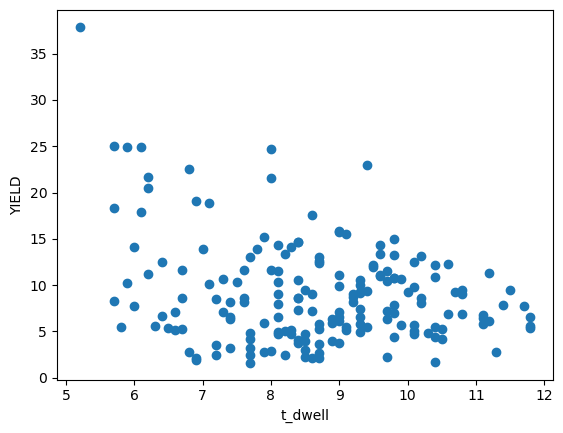

In [7]:
import matplotlib.cm as cm
for i in ["Flow1","Flow2","Flow3","Flow4","Flow5"]:
    plt.scatter(flow_data_all_avg[i],all_ms_data_avg["YIELD"],marker=".")
    plt.grid(axis="x")
    plt.xlabel(i)
    plt.ylabel("Product/Educt")
    plt.show()
    
plt.scatter(flow_data_all_avg["Flow1"],flow_data_all_avg["Flow2"],c=all_ms_data_avg["YIELD"],marker=".")

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(flow_data_all_avg["Flow2"],flow_data_all_avg["Flow3"],all_ms_data_avg["YIELD"],cmap=cm.plasma, linewidth=0.1)
#fig.colorbar(surf, shrink=0.3, aspect=5)
plt.xlabel("FLOW2")
plt.ylabel("FLOW3")
ax.set_zlim(0, 20)
plt.show()
plt.scatter(flow_data_all_avg["t_dwell"],all_ms_data_avg["YIELD"])
plt.xlabel("t_dwell")
plt.ylabel("YIELD")

In [8]:
all_data = pd.concat([flow_data_all_avg,all_ms_data_avg],axis=1)
print (all_data)
all_data.to_csv("RAW_data.csv")

          t[s]                timestamp Flow1 Flow2 Flow3 Flow4 Flow5 t_dwell  \
0      300.003  2023-04-03 19:46:13:803   2.3   0.5   0.8   2.5   2.0     8.1   
1      900.001  2023-04-03 19:56:13:801   0.7   2.8   2.1   0.9   2.0     8.5   
2     1500.001  2023-04-03 20:06:13:801   2.6   2.6   0.8   1.6   0.5     8.1   
3       2100.0  2023-04-03 20:16:13:800   1.7   1.8   1.4   0.6   2.1     7.6   
4     2700.001  2023-04-03 20:26:13:801   2.3   0.5   1.6   1.8   2.8     9.0   
..         ...                      ...   ...   ...   ...   ...   ...     ...   
175   9300.301  2023-04-08 19:39:45:139   0.5   1.9   1.6   0.8   2.9     7.7   
176   9900.318  2023-04-08 19:49:45:156   0.6   1.7   1.2   1.8   1.5     6.8   
177  10500.301  2023-04-08 19:59:45:139   1.5   2.5   1.6   2.8   2.2    10.6   
178    11100.3  2023-04-08 20:09:45:138   1.4   2.3   2.4   2.7   1.4    10.2   
179  11700.301  2023-04-08 20:19:45:139   1.0   2.1   1.6   1.5   1.9     8.1   

                t          

SCORE: 0.5927563112707347
MAE: 0.7113252618564759


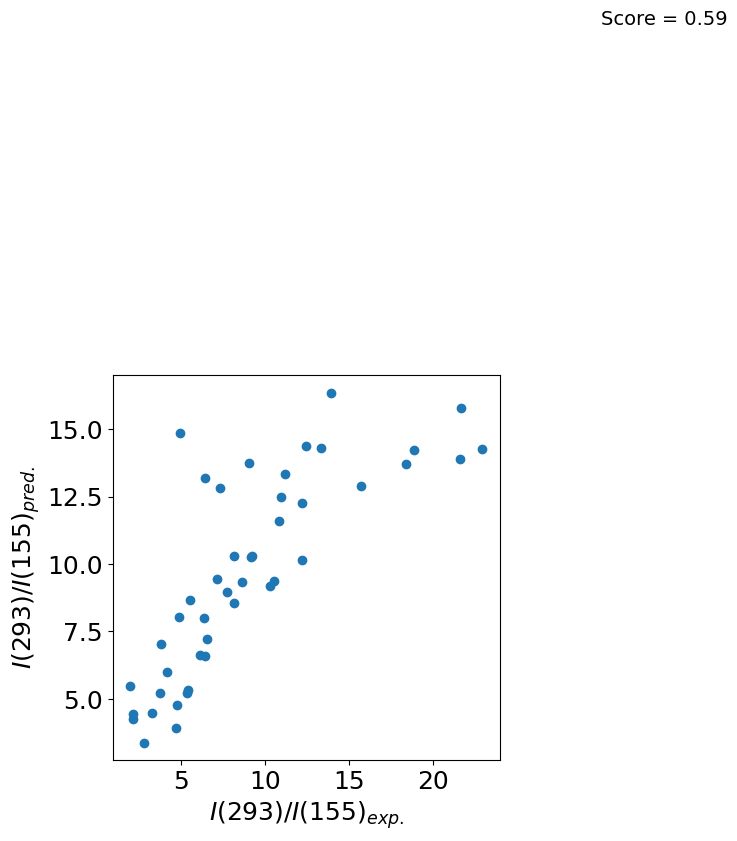

In [98]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.model_selection import train_test_split

X=flow_data_all_avg.loc[0:180,"Flow1":"Flow5"]
y=all_ms_data_avg.loc[0:180,"YIELD"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

#kernel = DotProduct(sigma_0=0.162) 
kernel = DotProduct()+ WhiteKernel(noise_level=100)
gpr = GaussianProcessRegressor(alpha=1,kernel=kernel,random_state=154879).fit(X_train, y_train)
score = gpr.score(X_test, y_test)
print ("SCORE:",score)

#gpr.predict(X_test, return_std=True)

size=18
params = {'legend.fontsize': 'large',
          'figure.figsize': (5,5),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size,
          'ytick.labelsize': size,
          'axes.titlepad': 18}


#cmap = plt.colormaps["viridis"].resampled(5)

plt.rcParams.update(params)

Y_pred = gpr.predict(X_test,return_std=True)
MAE = (Y_pred[0]-y_test).mean()
print ("MAE:",MAE)
plt.scatter(y_test,Y_pred[0])
plt.text(30, 30, 'Score = %s' %score.round(2), fontsize = 14)
plt.xlabel(r"$I(293)/I(155)_{exp.}$")
plt.ylabel(r"$I(293)/I(155)_{pred.}$")
#for flow in ["Flow1","Flow2","Flow3","Flow4","Flow5"]:
#    plt.errorbar(X_test[flow], Y_pred[0],yerr=Y_pred[1],c="tab:blue",label="GPR prediction and STD")
#    #plt.scatter(X_test[flow], Y_pred[0],c="tab:blue",label="GPR prediction and STD")
#    plt.scatter(X_test[flow], y_test,c="tab:orange",label="ground truth")
#    plt.legend()
#    #plt.scatter()
#    plt.title("such data, verry sience :D")#
#
#    plt.xlabel("Flowrate Cat.")
#    plt.ylabel("Product/Educt")
#    plt.show()

plt.savefig("Test_train_split_IV.png",dpi=300,bbox_inches="tight")

## Test the ammount of data needed


SCORE: 0.622353834803883
MAE: 0.36102883231025673
SCORE: 0.6237596971953652
MAE: -0.2773876843584918
SCORE: 0.6450173838554638
MAE: -0.35960951185296214
SCORE: 0.5992819880632861
MAE: 0.21956787898784216
SCORE: 0.5720859198974315
MAE: 0.09065797303079043
SCORE: 0.5860289464722315
MAE: -0.1725088590368095
SCORE: 0.5898732270782534
MAE: -0.10879317804861241
SCORE: 0.6105298503102465
MAE: -0.010814221056351395
SCORE: 0.5982787553705855
MAE: 0.015228238282888345
SCORE: 0.6171783147338352
MAE: 0.018122570010141243
SCORE: 0.6134058446675181
MAE: -0.08670790636653748


/home/sc.uni-leipzig.de/tg042ztyo/.conda/envs/ML4EDA/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


SCORE: 0.6101818329454838
MAE: -0.21480850307836646


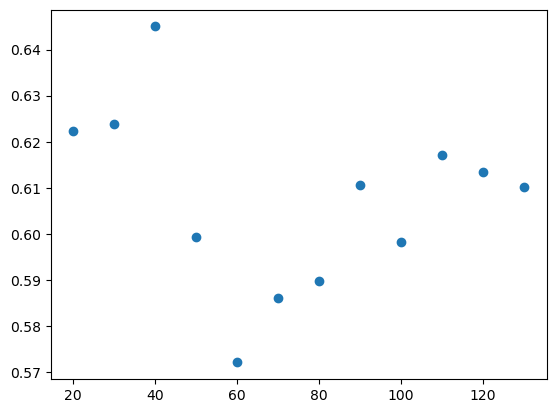

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.model_selection import train_test_split

X=flow_data_all_avg.loc[0:180,"Flow1":"Flow5"]
y=all_ms_data_avg.loc[0:180,"YIELD"]

scores = []
train_size = []
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
for i in list(range(20,len(y_train),10)):
    X_train2 = X_train[0:i]
    y_train2 = y_train[0:i]

    kernel = DotProduct(sigma_0=0.162) 
    #kernel = RationalQuadratic(length_scale=4.83)
    gpr = GaussianProcessRegressor(alpha=0.1,kernel=kernel,random_state=154879).fit(X_train2, y_train2)
    score = gpr.score(X_test, y_test)
    print ("SCORE:",score)

    #gpr.predict(X_test, return_std=True)


    Y_pred = gpr.predict(X_test,return_std=True)
    MAE = (Y_pred[0]-y_test).mean()
    print ("MAE:",MAE)
    scores.append(score)
    train_size.append(i)
    
plt.scatter(train_size, scores)

In [11]:
from scipy.optimize import minimize
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def function(paras):
    Flow1,Flow2,Flow3,Flow4,Flow5= paras
    X=(Flow1,Flow2,Flow3,Flow4,Flow5)
    X=np.reshape(X,(1,-1))
    print(X)
    Y, Y_STD = gpr.predict(X,return_std=True)
    return (-1*Y+0*Y_STD)

first_guess=(1.7,1.7,1.7,1.7,1.7)
bnds = ((1,2),(1,2),(1,2),(1,2),(1,2)) 
#def constr:

optim = minimize(function,first_guess,bounds=bnds,method="Nelder-Mead")
optim.x


[[1.7 1.7 1.7 1.7 1.7]]
[[1.785 1.7   1.7   1.7   1.7  ]]
[[1.7   1.785 1.7   1.7   1.7  ]]
[[1.7   1.7   1.785 1.7   1.7  ]]
[[1.7   1.7   1.7   1.785 1.7  ]]
[[1.7   1.7   1.7   1.7   1.785]]
[[1.734 1.615 1.734 1.734 1.734]]
[[1.751 1.53  1.751 1.751 1.751]]
[[1.7544 1.632  1.7544 1.7544 1.6354]]
[[1.77616 1.6048  1.77616 1.65716 1.69456]]
[[1.81424 1.5572  1.81424 1.59324 1.69184]]
[[1.821856 1.54768  1.702856 1.699456 1.691296]]
[[1.8705984 1.486752  1.7889984 1.6992384 1.6878144]]
[[1.9558976 1.380128  1.8334976 1.6988576 1.6817216]]
[[1.85395744 1.3588032  1.84239744 1.69878144 1.68050304]]
[[1.92438042 1.31752448 1.82319642 1.62213402 1.76314426]]
[[2.         1.16028672 1.85759462 1.55600102 1.82701638]]
[[2.         1.27163917 1.86923427 1.54753443 1.67795081]]
[[2.         1.14354284 1.98392957 1.5383098  1.73231673]]
[[2.         1.         2.         1.45773669 1.7528271 ]]
[[2.         1.         1.94684957 1.59032447 1.75616757]]
[[2.         1.         1.96047298 1.4414

array([2., 1., 1., 1., 1.])

### First search for best kernel and hyperparam without noise

In [12]:
from sklearn.gaussian_process.kernels import RationalQuadratic

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



param_grid = [{
    "alpha":  [1e-1, 1e-12],
    "kernel": [RBF(l) for l in np.logspace(-3, 3, 20)]
}, {
    "alpha":  [1e-1, 1e-12],
    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-3, 3, 30)]
}, {
    "alpha":  [1e-1, 1e-12],
    "kernel": [Matern(length_scale) for length_scale in np.logspace(-3, 3, 30)]
}, {
    "alpha":  [1e-1, 1e-12],
    "kernel": [RationalQuadratic(length_scale) for length_scale in np.logspace(-3, 3, 30)]
}
]

# scores for regression
scores = ['accuracy', 'neg_mean_absolute_error']

gp = GaussianProcessRegressor()
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=gp, param_grid=param_grid, cv=5,
                       scoring='%s' % score)
    clf.fit(X_test, y_test)
    print(clf.best_params_)

NameError: name 'RBF' is not defined

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.gaussian_process.kernels import RationalQuadratic

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn




param_grid = [
    {
    "kernel": [DotProduct(sigma_0=5.3)+WhiteKernel(n) for n in np.logspace(-4, 4, 50)]
}
]

# scores for regression
scores = ['accuracy', 'neg_mean_absolute_error']

gp = GaussianProcessRegressor(alpha=1e-12)
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=gp, param_grid=param_grid, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)
    print(clf.best_params_)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern, RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer





normi = Normalizer()
X=flow_data_all_avg.loc[0:180,"Flow1":"Flow5"]
y=all_ms_data_avg.loc[0:180,"YIELD"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

kernel = DotProduct(sigma_0=5.3) + WhiteKernel(noise_level=0.0001)
#kernel = RBF(length_scale=1)
gpr = GaussianProcessRegressor(alpha=1e-12,kernel=kernel,random_state=154879).fit(X_train, y_train)
score = gpr.score(X_test, y_test)
print ("SCORE:",score)

#gpr.predict(X_test, return_std=True)


Y_pred = gpr.predict(X_test,return_std=True)

plt.scatter(y_test,Y_pred[0])
plt.show()
MAE = (Y_pred[0]-y_test).mean()
print ("MAE:",MAE)
for flow in ["Flow1","Flow2","Flow3","Flow4","Flow5"]:
    plt.errorbar(X_test[flow], Y_pred[0],yerr=Y_pred[1],c="tab:blue",label="GPR prediction and STD")
    #plt.scatter(X_test[flow], Y_pred[0],c="tab:blue",label="GPR prediction and STD")
    plt.scatter(X_test[flow], y_test,c="tab:orange",label="ground truth")
    plt.legend()
    #plt.scatter()
    plt.title("such data, verry sience :D")

    plt.xlabel("Flowrate Cat.")
    plt.ylabel("Product/Educt")
    plt.show()
    


### Remove outliers? => Seems a bit better

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern, RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer





normi = Normalizer()

flow_data_all_avg2 = flow_data_all_avg
flow_data_all_avg2["YIELD"] = all_ms_data_avg["YIELD"]
flow_data_all_avg2 = flow_data_all_avg[flow_data_all_avg["YIELD"] < 19]

X=flow_data_all_avg2.loc[0:180,"Flow1":"Flow5"]
y=flow_data_all_avg2.loc[0:180,"YIELD"]


#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)





kernel = DotProduct(sigma_0=5.3)+WhiteKernel(noise_level=1)
#kernel = RBF(length_scale=1)
gpr = GaussianProcessRegressor(alpha=1e-6,kernel=kernel,random_state=154879).fit(X_train, y_train)
score = gpr.score(X_test, y_test)
print ("SCORE:",score)

#gpr.predict(X_test, return_std=True)


Y_pred = gpr.predict(X_test,return_std=True)

plt.scatter(y_test,Y_pred[0])
plt.show()
MAE = (Y_pred[0]-y_test).mean()
print ("MAE:",MAE)
for flow in ["Flow1","Flow2","Flow3","Flow4","Flow5"]:
    plt.errorbar(X_test[flow], Y_pred[0],yerr=Y_pred[1],c="tab:blue",label="GPR prediction and STD")
    #plt.scatter(X_test[flow], Y_pred[0],c="tab:blue",label="GPR prediction and STD")
    plt.scatter(X_test[flow], y_test,c="tab:orange",label="ground truth")
    plt.legend()
    #plt.scatter()
    plt.title("such data, verry sience :D")

    plt.xlabel("Flowrate Cat.")
    plt.ylabel("Product/Educt")
    plt.show()
    


In [ ]:
 # TEST KRR
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
import numpy as np
krr = SVR(C=10, kernel=DotProduct(sigma_0=5.3)+WhiteKernel())
krr.fit(X_train, y_train)
score = krr.score(X_test,y_test)
print (score)
y_pred = krr.predict(X_test)
plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

gp = GaussianProcessRegressor()
distributions = dict(alpha=uniform(loc=0, scale=4),kernel=RBF(uniform(loc=0, scale=4)))

param_grid = [{
    "alpha":  sp_randFloat(),
    "length_scale": sp_randFloat(),
}
]



clf = RandomizedSearchCV(gp, distributions, random_state=0,n_iter=100, scoring='accuracy', cv=5)
search = clf.fit(X_train, y_train)
search.best_params_

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern, RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

normi = Normalizer()
X=flow_data_all_avg.loc[0:180,"Flow1":"Flow5"]
y=all_ms_data_avg.loc[0:180,"YIELD"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.35)

#kernel = DotProduct(sigma_0=0.162) 
kernel = RBF(length_scale=0.886)
gpr = GaussianProcessRegressor(alpha=1.6,kernel=kernel,random_state=154879).fit(X_train, y_train)
score = gpr.score(X_test, y_test)
print ("SCORE:",score)

#gpr.predict(X_test, return_std=True)


Y_pred = gpr.predict(X_test,return_std=True)

plt.scatter(y_test,Y_pred[0])
plt.show()
MAE = (Y_pred[0]-y_test).mean()
print ("MAE:",MAE)
for flow in ["Flow1","Flow2","Flow3","Flow4","Flow5"]:
    plt.errorbar(X_test[flow], Y_pred[0],yerr=Y_pred[1],c="tab:blue",label="GPR prediction and STD")
    #plt.scatter(X_test[flow], Y_pred[0],c="tab:blue",label="GPR prediction and STD")
    plt.scatter(X_test[flow], y_test,c="tab:orange",label="ground truth")
    plt.legend()
    #plt.scatter()
    plt.title("such data, verry sience :D")

    plt.xlabel("Flowrate Cat.")
    plt.ylabel("Product/Educt")
    plt.show()
    


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.model_selection import train_test_split

X=flow_data_all_avg.loc[0:180,"Flow1":"Flow5"]
y=all_ms_data_avg.loc[0:180,"YIELD"]
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
scores = []
train_size = []

for i in list(range(40,len(y_train),10)):
    
    X2=flow_data_all_avg.loc[0:i,"Flow1":"Flow5"]
    y2=all_ms_data_avg.loc[0:i,"YIELD"]
    X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.25)
    #X_train2 = X_train[0:i]
    #y_train2 = y_train[0:i]

    kernel = DotProduct(sigma_0=0.162) 
    #kernel = RationalQuadratic(length_scale=4.83)
    gpr = GaussianProcessRegressor(alpha=0.1,kernel=kernel,random_state=154879).fit(X_train, y_train)
    score = gpr.score(X_test, y_test)
    print ("SCORE:",score)

    #gpr.predict(X_test, return_std=True)


    Y_pred = gpr.predict(X_test,return_std=True)
    MAE = (Y_pred[0]-y_test).mean()
    print ("MAE:",MAE)
    scores.append(score)
    train_size.append(i)
    
plt.scatter(train_size, scores)

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF, DotProduct

Y = y
X = X
param_grid = [{
    "alpha":  [100000, 1e-6],
    "kernel": [DotProduct()+ WhiteKernel(noise_level=n) for n in np.logspace(-100, 1000, 2)]}]


# scores for regression
#scores = ['explained_variance', 'r2']

gp = GaussianProcessRegressor()

#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-6],
#                     'C': [1, 10, 100, 1000]},
 #                   {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall',]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=gp, param_grid=param_grid, cv=5,
                       scoring='%s' % score)
    clf.fit(X,Y)
    print(clf.best_params_)
    


In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic

param_grid = [{
    "alpha":  [1e-1, 1e-6],
    "kernel": [RBF(l) for l in np.logspace(-1, 1, 20)]
}, {
    "alpha":  [1e-1, 1e-6],
    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, 20)]
}, {
    "alpha":  [1e-1, 1e-6],
    "kernel": [Matern(length_scale) for length_scale in np.logspace(-1, 1, 20)]
}, {
    "alpha":  [1e-1, 1e-6],
    "kernel": [RationalQuadratic(length_scale) for length_scale in np.logspace(-1, 1, 20)]
}
]

# scores for regression
scores = ['explained_variance', 'r2', 'accuracy', 'neg_mean_absolute_error','max_error']

gp = GaussianProcessRegressor()
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=gp, param_grid=param_grid, cv=5,
                       scoring='%s' % score)
    clf.fit(X_test, y_test)
    print(clf.best_params_)

In [ ]:

#kernel = Matern() + WhiteKernel(noise_level=4)
kernel = DotProduct()+ WhiteKernel(noise_level=100)
gpr = GaussianProcessRegressor(kernel=DotProduct(sigma_0=4.83), alpha=0.1,
    random_state=154879).fit(X_train, y_train)
score = gpr.score(X_test, y_test)
print ("SCORE:",score)
#MAE = (Y_pred[0]-y_test).mean()
#print ("MAE:",MAE)
#gpr.predict(X_test, return_std=True)


Y_pred = gpr.predict(X_test,return_std=True)
for flow in ["Flow1","Flow2","Flow3","Flow4","Flow5"]:
    plt.errorbar(X_test[flow], Y_pred[0],yerr=Y_pred[1],c="tab:blue",label="GPR prediction and STD")
    #plt.scatter(X_test[flow], Y_pred[0],c="tab:blue",label="GPR prediction and STD")
    plt.scatter(X_test[flow], y_test,c="tab:orange",label="ground truth")
    plt.legend()
    #plt.scatter()
    plt.title("such data, verry sience :D")

    plt.xlabel("Flowrate Cat.")
    plt.ylabel("Product/Educt")
    plt.show()


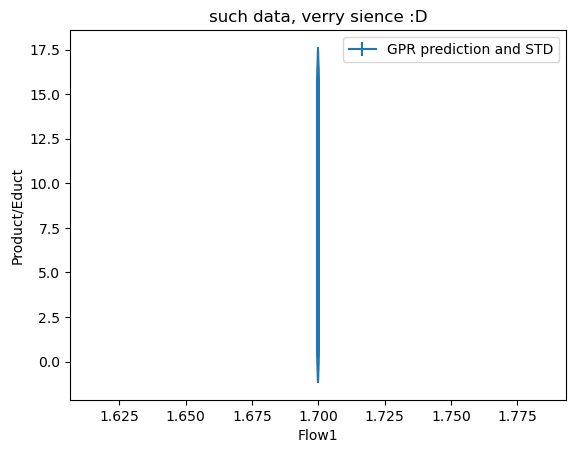

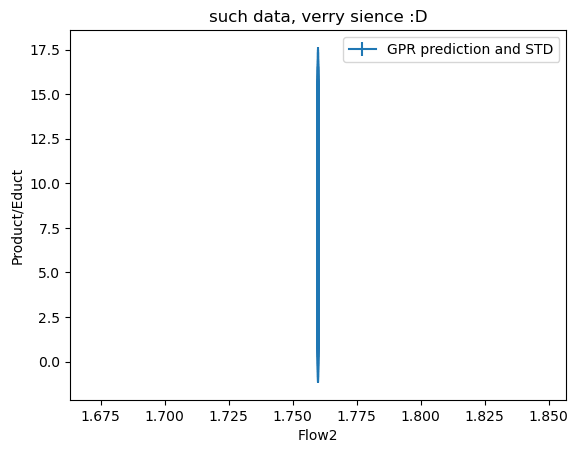

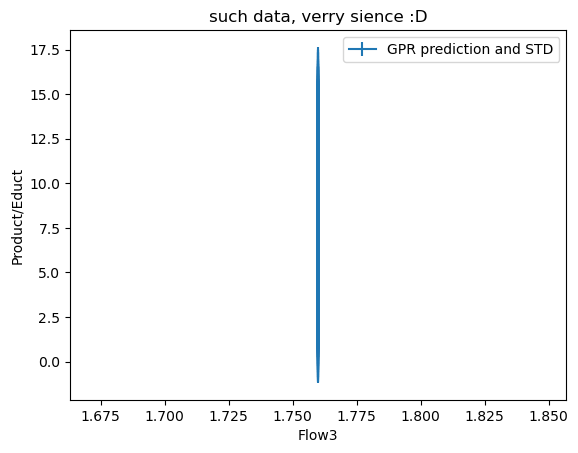

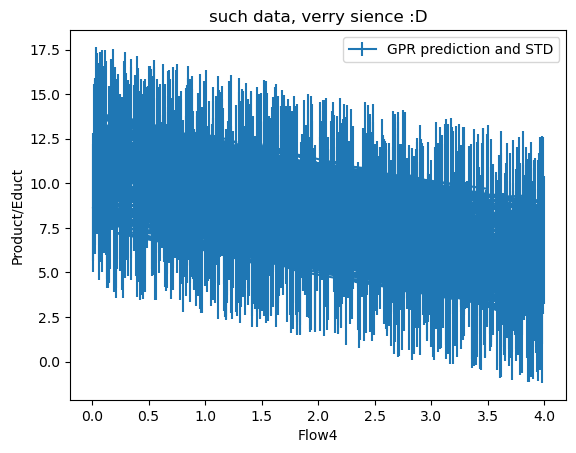

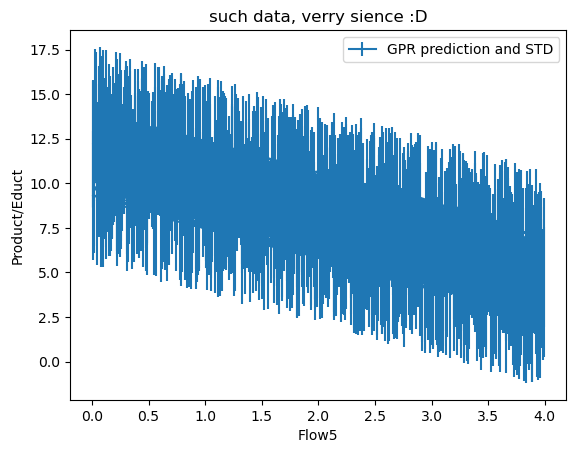

Text(0, 0.5, 'Flow5')

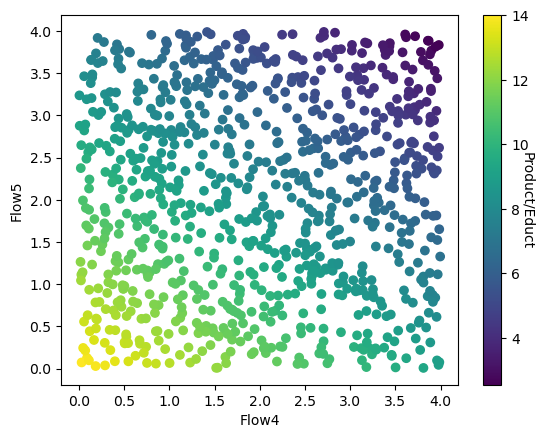

In [52]:
import random


Flow_1_test = [1.70]*900
Flow_2_test = [1.76]*900
Flow_3_test = [1.76]*900
Flow_4_test = [i/1000 for i in random.sample(range(0, 4000), 900)]
Flow_5_test = [i/1000 for i in random.sample(range(0, 4000), 900)]
#t_dwell = [sum(i) for i in zip(Flow_1_test,Flow_2_test,Flow_3_test,Flow_4_test,Flow_5_test)]


X_test_pred = pd.DataFrame(zip(Flow_1_test,Flow_2_test,Flow_3_test,Flow_4_test,Flow_5_test),columns =["Flow1","Flow2","Flow3","Flow4","Flow5"])
y_test_pred = gpr.predict(X_test_pred,return_std=True)
for flow in ["Flow1","Flow2","Flow3","Flow4","Flow5"]:
    plt.errorbar(X_test_pred[flow], y_test_pred[0],yerr=y_test_pred[1],c="tab:blue",label="GPR prediction and STD")
    #plt.scatter(X_test[flow], y_test_pred[1],c="tab:blue",label="ERROR")
    #plt.scatter(X_test_pred[flow], y_test,c="tab:orange",label="ground truth")
    plt.legend()
    #plt.scatter()
    plt.title("such data, verry sience :D")
    plt.xlabel(flow)
    plt.ylabel("Product/Educt")
    plt.show()
plt.scatter(X_test_pred["Flow4"],X_test_pred["Flow5"],c=y_test_pred[0])
cbar = plt.colorbar()
cbar.set_label('Product/Educt', rotation=270)
plt.xlabel("Flow4")
plt.ylabel("Flow5")